In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import decoupler as dc

In [18]:
out_dir = '../../results/05_fibroblast/12_tf_enrichment'
os.makedirs(out_dir, exist_ok=True)

In [3]:
adata = sc.read_h5ad('../../results/05_fibroblast/01_clustering/fibroblast.h5ad')

In [4]:
net = dc.get_collectri(organism='human', split_complexes=False)

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

In [5]:
dc.run_ulm(
    mat=adata,
    net=net,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

4 features of mat are empty, they will be removed.
Running ulm on mat with 38895 samples and 15271 targets for 694 sources.


  0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
adata.obsm['ulm_estimate']

,ABL1,AEBP1,AHR,AHRR,AIP,AIRE,AP1,APEX1,AR,ARID1A,...,ZNF382,ZNF384,ZNF395,ZNF423,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,ZXDC
0,-0.476860,-0.337152,-0.358434,-0.112374,0.337156,-0.843671,3.319702,-0.410621,1.160385,-0.664982,...,-0.646735,1.762351,-0.615644,-0.561991,-0.664989,-0.538870,1.194435,-1.604872,2.997202,-0.562032
1,-0.322494,-0.228012,-0.114458,-0.075997,0.228014,-0.570557,3.577315,2.475169,0.966818,-0.449716,...,-2.257320,2.315624,-0.416350,-0.380066,-0.449722,1.442480,-0.138756,-0.138757,-0.885876,-0.380093
3,1.413491,-0.220656,-1.073390,-0.073546,0.220659,-0.552152,3.328330,0.450017,2.341857,-0.435209,...,-1.205586,2.880453,1.824940,-0.367806,-0.435214,-0.201277,-0.134281,-0.134282,0.123360,-0.367832
4,-0.549399,-0.388439,0.760263,-0.129468,0.388444,1.227662,3.776228,1.440450,3.874963,-0.766140,...,-0.537053,1.695809,-0.709296,-0.647481,0.314709,0.203291,0.930818,-0.236383,2.985917,1.107910
5,1.831666,1.788970,1.413296,-3.803242,0.838338,-0.797651,2.536979,4.813063,3.269785,2.099612,...,-3.437724,1.414565,-0.582062,-0.531336,-0.628717,-0.412708,-1.690566,-0.193983,2.026927,1.056977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTCATTAGC-1_21,1.683605,1.666774,1.176595,-0.920001,0.555872,2.142448,5.511147,1.023389,3.804419,-0.352603,...,-3.288527,0.829255,-1.015028,-0.046568,-0.724485,1.069786,1.205933,-0.338268,2.469021,1.226893
TTTGCGCTCTTACCTA-1_21,1.374547,4.079342,1.722908,-0.126764,0.380339,1.708905,3.743109,0.456770,3.858739,0.189782,...,-0.676271,1.436602,-0.694496,-0.633973,1.129755,0.515305,-0.231452,-0.231454,0.466509,2.071036
TTTGGTTTCCGAAGAG-1_21,0.558055,2.521761,0.411711,-0.139688,-0.809527,1.933064,2.229244,2.019236,3.202821,-0.826635,...,0.412604,1.460613,-0.765301,-0.698607,-0.826642,-0.150642,0.487679,-0.255050,1.711234,3.058981
TTTGTCACACTCAGGC-1_21,2.121575,0.044298,1.951916,-0.173747,0.521302,3.675372,5.960010,0.532186,4.221148,0.986413,...,-3.142635,2.332006,-0.122110,-0.868946,0.406098,0.857648,0.084841,-1.146879,1.845324,-0.303287


In [7]:
adata.obsm['collectri_ulm_estimate'] = adata.obsm['ulm_estimate'].copy()
adata.obsm['collectri_ulm_pvals'] = adata.obsm['ulm_pvals'].copy()
adata

AnnData object with n_obs × n_vars = 38895 × 15275
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sub_clusters'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'condition_colors', 'data_colors', 'dendrogram_sub_clusters', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sub_clusters_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
acts = dc.get_acts(adata, obsm_key='ulm_estimate')
acts

AnnData object with n_obs × n_vars = 38895 × 694
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sub_clusters'
    uns: 'cell_type_colors', 'condition_colors', 'data_colors', 'dendrogram_sub_clusters', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sub_clusters_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'ulm_estimate', 'ulm_pvals', 'collectri_ulm_estimate', 'collectri_ulm_pvals'

In [11]:
df = dc.rank_sources_groups(acts, groupby='sub_clusters', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,Fib1,rest,GCM1,60.471508,1.331015,0.000000e+00,0.000000e+00
1,Fib1,rest,ETV7,58.100394,0.788865,0.000000e+00,0.000000e+00
2,Fib1,rest,HOXD3,53.148964,1.116284,0.000000e+00,0.000000e+00
3,Fib1,rest,MSC,51.565157,0.709836,0.000000e+00,0.000000e+00
4,Fib1,rest,TBX5,51.415637,0.704086,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
6935,Fib9,rest,OTX2,-21.076544,-0.565657,2.394640e-92,2.518000e-91
6936,Fib9,rest,TBX2,-21.702980,-0.834362,1.410947e-97,1.659656e-96
6937,Fib9,rest,MZF1,-24.579864,-0.890931,7.005959e-122,1.185887e-120
6938,Fib9,rest,SMAD7,-24.615262,-1.325848,1.925684e-122,3.341062e-121


In [16]:
n_markers = 3
source_markers = df.groupby('group').head(n_markers).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
source_markers

{'Fib1': ['GCM1', 'ETV7', 'HOXD3'],
 'Fib10': ['SSRP1', 'ETV6', 'KLF6'],
 'Fib2': ['SCX', 'GLI2', 'BHLHA15'],
 'Fib3': ['NR1H4', 'ZNF236', 'SMARCA5'],
 'Fib4': ['AEBP1', 'NR1H3', 'NR1H4'],
 'Fib5': ['ELK4', 'ELK1', 'PHOX2B'],
 'Fib6': ['POU2F2', 'TFAP2B', 'NR5A2'],
 'Fib7': ['TCF15', 'NFIX', 'BCL11A'],
 'Fib8': ['POU2F2', 'HMGA1', 'THRA'],
 'Fib9': ['SMAD3', 'JUN', 'SMAD4']}

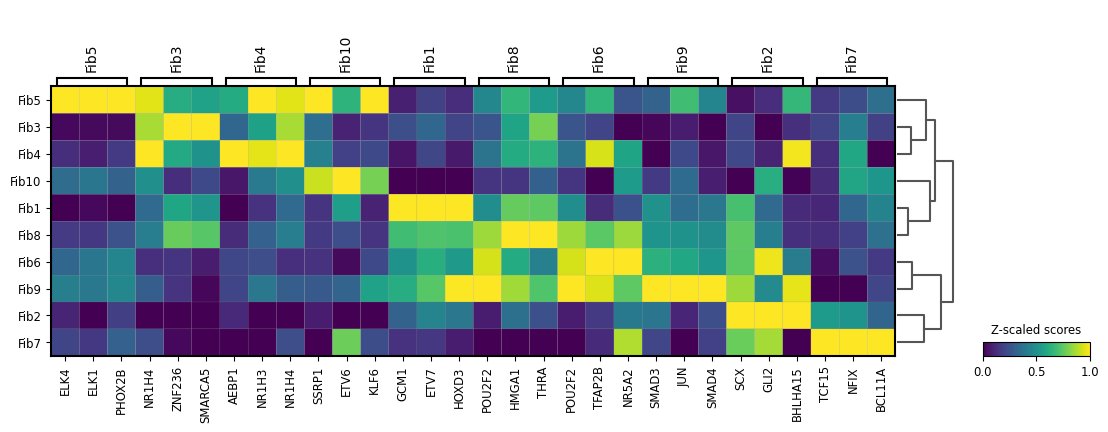

In [17]:
sc.pl.matrixplot(acts, source_markers, 'sub_clusters', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores')

In [19]:
acts.write_h5ad(f'{out_dir}/act.h5ad')